# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results
- BONUS: Perform all the plots in 3D instead of 2D

## 1. Create a 4 dimensional data set with 64 elements and show 2D plots of the data $x_1 \rightarrow y, x_2 \rightarrow y$, etc.

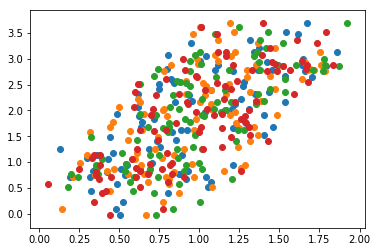

In [29]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

n = 100
x = np.linspace(0,1,n) + np.random.rand(4,n)
x = np.vstack([x,np.ones(len(x.T))]).T
y = np.linspace(0,3,n) + np.random.rand(n)-0.1

plt.scatter(x.T[0],y)
plt.scatter(x.T[1],y)
plt.scatter(x.T[2],y)
plt.scatter(x.T[3],y)

## 2.  Create a model to fit the data. Hint: follow the example from Lesson 3

In [34]:
beta = np.linalg.lstsq(x, y)[0]
beta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 0.6156227 ,  0.19211343,  0.67652537,  0.91748491, -0.46455621])

## 3. Plot the model's prediction in 2D for 2 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p$) along with the original points

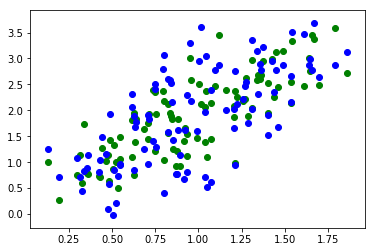

In [40]:
pred = np.dot(x, beta)
plt.scatter(x.T[0], pred, c='g')
plt.scatter(x.T[0], y, c='b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and create a model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [64]:
import pandas as pd
credit = pd.read_csv('Credit.csv')

X = credit[['Income', 'Cards', 'Education']].values
X = np.vstack([X.T, np.ones(len(X))]).T
Y = credit[['Rating']]

beta = np.linalg.lstsq(X, Y)[0]
beta

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[  3.47902406],
       [  7.61363118],
       [ -0.23483223],
       [178.2635903 ]])

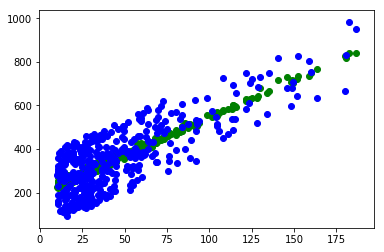

In [67]:
pred = np.dot(X, beta)
plt.scatter(X.T[0], pred, c='g')
plt.scatter(X.T[0], Y, c='b')

In [60]:
y = credit['Rating']

### 5. Plot your results (Bonus if you use 3D plots). Show as many of your columns vs. credit rating that you can. 